In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings(action='ignore')

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [2]:
url = 'https://raw.githubusercontent.com/yakushinav/omo/main/data/iris.csv'
data = pd.read_csv(url)
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
train, test = train_test_split(data, test_size = 0.4, stratify = data['species'], random_state = 42)

In [4]:
X_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
y_train = train.species
X_test = test[['sepal_length','sepal_width','petal_length','petal_width']]
y_test = test.species

fn = ['sepal_length','sepal_width','petal_length','petal_width']
cn = data['species'].unique()

In [5]:
mod_lda_all = LinearDiscriminantAnalysis()
y_pred = mod_lda_all.fit(X_train, y_train).predict(X_test)

In [6]:
y_pred=mod_lda_all.predict(X_test)

print('accuracy (точность) классификатора',metrics.accuracy_score(y_pred,y_test))

print("матрица ошибок")
print(metrics.confusion_matrix(y_test, y_pred))

accuracy (точность) классификатора 0.9833333333333333
матрица ошибок
[[20  0  0]
 [ 0 20  0]
 [ 0  1 19]]


In [7]:
new_iris=[1.3, 2.4, 5.6, 3.5]
y_new_iris=mod_lda_all.predict([new_iris])

print(y_new_iris)

['Iris-virginica']


In [8]:
print(mod_lda_all.intercept_)
print(mod_lda_all.coef_)

[ -6.04323394  -3.92033351 -41.3210986 ]
[[  6.32361417   9.610657   -17.46495871 -19.96252144]
 [ -1.3556569   -3.69530297   4.7397141    1.94664665]
 [ -4.96795728  -5.91535404  12.72524461  18.01587479]]


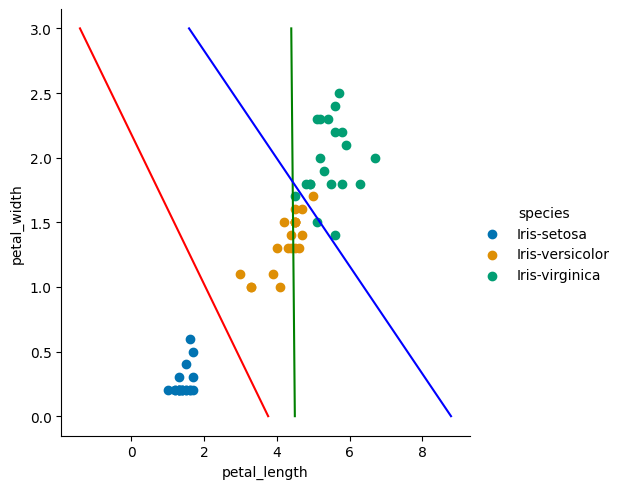

In [9]:
mod_lda_1 = LinearDiscriminantAnalysis()
selected_predictors = ["petal_length", "petal_width"]
y_pred = mod_lda_1.fit(X_train[selected_predictors], y_train).predict(X_test[selected_predictors])

g = sns.FacetGrid(test, hue="species", height=5, palette = 'colorblind').map(plt.scatter,"petal_length", "petal_width", ).add_legend()
my_ax = g.ax

y1 = np.array([3, 0])

for i, c in enumerate(['r','g','b']):
    b, w1, w2 = mod_lda_1.intercept_[i], mod_lda_1.coef_[i][0], mod_lda_1.coef_[i][1]
    x1 = -(b+y1*w2)/w1    
    plt.plot(x1,y1,c=c)

In [10]:
mod_qda_all = QuadraticDiscriminantAnalysis()
y_pred = mod_qda_all.fit(X_train, y_train).predict(X_test)
print('accuracy (точность) классификатора QDA ',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

print("матрица ошибок")
print(metrics.confusion_matrix(y_test, y_pred))

accuracy (точность) классификатора QDA  0.983
матрица ошибок
[[20  0  0]
 [ 0 20  0]
 [ 0  1 19]]


In [11]:
new_iris=[1.3, 2.4, 5.6, 3.5]
y_new_iris=mod_qda_all.predict([new_iris])

print(y_new_iris)

['Iris-virginica']


In [13]:
print(mod_qda_all.means_)

[[4.98666667 3.42       1.49       0.23666667]
 [5.97       2.74       4.27       1.31333333]
 [6.64666667 3.01666667 5.62333333 2.05666667]]
